# Algoritmusok elemző összehasonlítása

Szerző: Limbek Zsófia (Neptun-kód: `ANR9D8`), matematika-informatika tanárszakos hallgató

*Korábban adatelemzőként, jelenleg programozóként (azon belül nem funkcionális tesztelőként) dolgozom.*

## 1. Bevezetés

Dolgozatomban az Eszterházy Károly Egyetem `LBT_PI212G3` kódú, Adatszerkezetek és algoritmusok gy. tárgyából tanult algoritmusokat elemzem. Az implementációk mellett különböző bemenetekkel mért futásidőket is bemutatok, illetve összehasonlítom az azonos célra használt különböző algoritmusokat.

#### Eszközök

Az algoritmusok implementálásához, a futásidők méréséhez, az adatok összegyűjtéséhez és ábrázolásához a `Python 3` programnyelvet használtam (verzió: `3.8`). A teljes kód megtalálható a [ebben](https://github.com/zslim/algoritmusok_elemzes) a GitHub repóban. A méréseket Ubuntu 20.04 operációs rendszeren végeztem. 

A dolgozatban bemutatom az algoritmusok kódját, illetve a táblázatos kimutatásokat és az ábrákat itt készítem el. Ezekhez a `csv` formátumban elmentett mérési adatokat fogom beolvasni. Az elemzést a `pandas` és a `plotnine` csomagok segítségével végzem, amiket most importálok, a gyökvonáshoz és kerekítésekhez szükséges `math` csomaggal együtt.

In [5]:
import math
import pandas
from plotnine import *

#### Paraméterezés

A bemutatott algoritmusokat random számokkal feltöltött listákra futtattam le az alábbi módon.
A bemenő listák elemszámát 1000-től indulva, ezrenként lépve, 10000-ig emeltem.
Minden elemszámra több futtatást végeztem.
A metszet és unió algoritmusok esetében ez a szám, a futás hossúsága miatt 10 (az unió 20 perc alatt futott le minden inputra), a többi algoritmusnál felemeltem 100-ra.
Minden futtatásnál új random bemenetet generáltam.
Ahol két bemenő lista van, ott mindkettőnek változtattam az elemszámát, de, szintén a hosszú futásidő miatt, mindig úgy, hogy az első sorozat elemszáma kisebb vagy egyenlő a másodikéval.
Ez a metszet és az unió esetében aggályos lehet, mivel egyik sem szimmetrikus a paraméterekre nézve.

#### Ábrák

Az ábrázoláshoz legtöbb esetben vonaldiagrammokat használok. 
Ez szépen mutatja a trendeket, és ismerős a szemnek, könnyen olvasható.
A rendezett sorozatokon végzett keresések eredményeit oszlopdiagrammon mutatom be, mert így könnyen összehasonlíthatóak az azonos algoritmussal, de eltérő sikerességgel végzett mérések.
A harmadik túpusú ábra, amit használok, a dobozábra.
Ehhez nincs szükség az adatok aggregálására, a dobozábra megmutatja az adatok eloszlását egy adott kategórián belül.
Két olyan esetben választottam a dobozábrát, amikor ez a megoszlás érdekesnek tűnt.

## 2. Alap algoritmusok

Dolgozatom első részében a metszet, az unió és az összefuttatás algoritmusokat mutatom be.
Ezek közös jellemzője, hogy két sorozatot fogadnak paraméterként, és egy sorozattal térnek vissza.

A metszettel és az unióval kapcsolatban megjegyzem, hogy bár a nevüket ezek az algoritmusok a megfelelő halmazelméleti műveletekről kapták, az alábbi implementációk kihasználják a két bemenő sorozat indexelhetőségét, ezért ezek nem lehetnek halmaz (`set`) típusúak a programban.

Mindkettő implementációjához használtam azt a lineáris idejű algoritmust, aminek a segítségével eldönthető, hogy egy sorozat tartalmaz-e egy elemet:

In [2]:
def _does_include(array, element):
    i = 0
    while i < len(array) and element != array[i]:
        i += 1
    return i < len(array)

### 2.1. Metszet

Az alábbi egyszerű metszet algoritmus végigiterál az első paraméteren (`array1`), és mindegyik elemnél megvizsgálja, hogy a másik sorozat (`array2`) tartalmazza-e azt az elemet.
Ha igen, az adott elem bekerül a metszetbe.
Mivel a tartalmazás eldöntéséhez végig kell iterálni az `array2`-n, az algoritmus egymásba ágyazott ciklusokat tartalmaz, tehát négyzetes idejű.

In [ ]:
def intersection(array1, array2):
    result = []
    for element in array1:
        if _does_include(array2, element):
            result.append(element)
    return result

Az alábbi kereszttáblában az adott elemszámú paraméterekkel végzett futtatások átlagidejei láthatóak, másodpercben mérve. Az algoritmus viszonylag hamar, a három- és négyezres bemeneteknél átlépte az egy másodperces futásidőt, a maximális bemenetnél pedig megközelítette a 9 másodpercet.

In [70]:
intersection_df = pandas.read_csv("data/intersection.csv")
pandas.crosstab(intersection_df.param1, intersection_df.param2, values=intersection_df.seconds, aggfunc="mean")

param2,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000
param1,,,,,,,,,,
1000,0.094239,0.181849,0.271838,0.361679,0.450662,0.534896,0.624545,0.708342,0.799377,0.878267
2000,NaN,0.368968,0.543451,0.717989,0.900829,1.075244,1.243090,1.420706,1.590030,1.774727
3000,NaN,NaN,0.814164,1.085230,1.392812,1.638828,1.917270,2.129926,2.378510,2.647721
4000,NaN,NaN,NaN,1.492271,1.828145,2.161118,2.494512,2.863224,3.196216,3.534339
5000,NaN,NaN,NaN,NaN,2.256363,2.714560,3.164156,3.541575,4.066078,4.471794
6000,NaN,NaN,NaN,NaN,NaN,3.247781,3.782138,4.325178,4.761391,5.296826
7000,NaN,NaN,NaN,NaN,NaN,NaN,4.388997,4.987703,5.652090,6.213094
8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.694329,6.410424,7.043848
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.190410,7.917006


A következő diagramon a két azonos méretű bemenő sorozattal végzett futtatásokat ábrázolom egy vonaldiagrammon. Jól látszik, hogy az eltelt idő nagyobb mértékben nőtt, mint amennyivel a paraméterek elemszámát növeltem, a mediánok parabolát rajzolnak ki - a futásidők valóban négyzetes növekedést követtek.

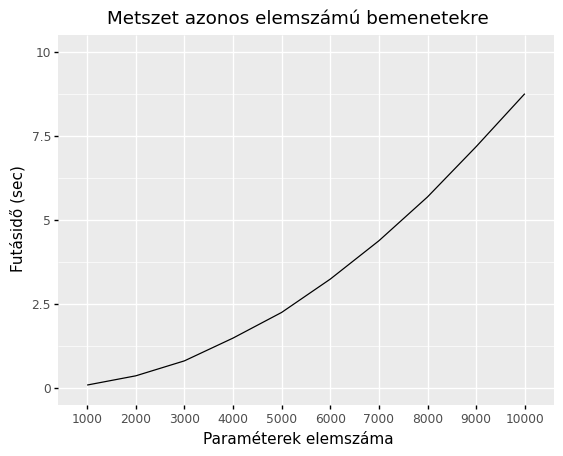

<ggplot: (8728694973654)>

In [83]:
intersection_diagonal = intersection_df.query("param1 == param2").copy()
intersection_diagonal["param_cat"] = pandas.Categorical(intersection_diagonal.param1)
intersection_plot_data = intersection_diagonal.loc[:, ["param_cat", "seconds"]].groupby("param_cat").mean()
intersection_plot_data["param"] = intersection_plot_data.index.values
intersection_plot = (
    ggplot(intersection_plot_data, aes(x="param", y="seconds"))
    + geom_line(aes(group=1))
    + xlab("Paraméterek elemszáma")
    + ylab("Futásidő (sec)")
    + ggtitle("Metszet azonos elemszámú bemenetekre")
    + ylim(0, 10)
)
intersection_plot

### 2.2. Unió

A következő algoritmus úgy állítja elő a két bemenő sorozat unióját, hogy az első paramétert lemásolja, majd a másodikból kiválogatja azokat az elemeket, amik az első paraméterben nem találhatóak meg. A fent bemutatott metszet algoritmushoz hasonlóan négyzetes futási idejű.

In [ ]:
def union(array1, array2):
    result = array1[:]
    for element in array2:
        if not _does_include(array1, element):
            result.append(element)
    return result

Az alábbi kereszttábla nagyon hasonló értékeket mutat, mint amiket a metszetnél láthattunk, bár a legtöbb érték néhány századmásodperccel magasabb.

In [86]:
union_df = pandas.read_csv("data/union.csv")
pandas.crosstab(union_df.param1, union_df.param2, values=union_df.seconds, aggfunc="mean")

param2,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000
param1,,,,,,,,,,
1000,0.090852,0.180835,0.270509,0.361186,0.459607,0.546264,0.632037,0.723789,0.811616,0.901637
2000,NaN,0.363865,0.540184,0.733855,0.910440,1.091256,1.286803,1.452705,1.621274,1.830257
3000,NaN,NaN,0.813118,1.088361,1.373603,1.651648,1.897947,2.165307,2.499989,2.699601
4000,NaN,NaN,NaN,1.432718,1.820029,2.162033,2.555183,2.905704,3.261712,3.626609
5000,NaN,NaN,NaN,NaN,2.250567,2.708840,3.167764,3.580671,4.016328,4.457057
6000,NaN,NaN,NaN,NaN,NaN,3.189294,3.728648,4.314834,4.795246,5.349383
7000,NaN,NaN,NaN,NaN,NaN,NaN,4.364509,4.938315,5.742100,6.258524
8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.690958,6.481376,7.118930
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.172333,7.953645


Az ábráról a metszet algoritmushoz hasonlóan négyzetes futási idő olvasható le. Ismét 10 másodperces skálán mozogtak az értékek.

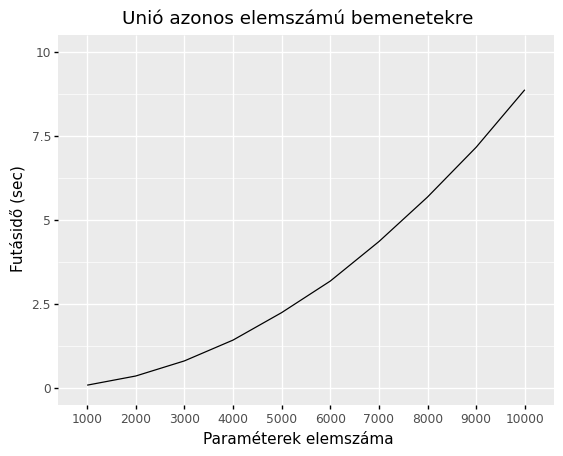

<ggplot: (8728695864483)>

In [88]:
union_diagonal = union_df.query("param1 == param2").copy()
union_diagonal["param_cat"] = pandas.Categorical(union_diagonal.param1)
union_plot_data = union_diagonal.loc[:, ["param_cat", "seconds"]].groupby("param_cat").mean()
union_plot_data["param"] = union_plot_data.index.values
union_plot = (
    ggplot(union_plot_data, aes(x="param", y="seconds"))
    + geom_line(aes(group=1))
    + xlab("Paraméterek elemszáma")
    + ylab("Futásidő (sec)")
    + ggtitle("Unió azonos elemszámú bemenetekre")
    + ylim(0, 10)
)
union_plot

### 2.3. Összefuttatás

Az összefuttatás algoritmus két rendezett sorozatból előállítja azt a rendezett sorozatot, ami tartalmaz minden elemet, amit legalább az egyik bemenő sorozat tartalmaz. Az eredmény tehát a két bemenő sorozat halmazelméleti uniója. Ez az algoritmus azonban nem tartalmaz egymásba ágyazott ciklusokat, a két bemeneten egyszerre iterál. Emiatt a futásideje a bemenő sorozatok hosszával arányosan nő (lineáris idejű).

In [ ]:
def merge_sorted(array1, array2):
    result = []
    n = len(array1)
    m = len(array2)
    i = 0
    j = 0
    while i < n and j < m:
        a_current = array1[i]
        b_current = array2[j]
        if a_current < b_current:
            result.append(a_current)
            i += 1
        elif a_current == b_current:
            result.append(a_current)
            i += 1
            j += 1
        else:
            result.append(b_current)
            j += 1
    if i >= n:
        result += array2[j:]
    else:
        result += array1[i:]
    return result

Az alábbi kereszttáblában látható értékek négy (!) nagyságrenddel kisebbek, mint a rendezetlen unió algoritmus mérési eredményei. Míg ott a legnagyobb bemenetekre a futásidő megközelítette a 10 másodpercet, itt akkor is egy század alatt marad.

In [35]:
merge = pandas.read_csv("data/merge_sorted.csv")
pandas.crosstab(merge.param1, merge.param2, values=merge.seconds, aggfunc="mean")

param2,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000
param1,,,,,,,,,,
1000,0.000363,0.000531,0.000750,0.000918,0.001078,0.001265,0.001437,0.001634,0.001788,0.001969
2000,NaN,0.000713,0.000913,0.001095,0.001267,0.001445,0.001617,0.001816,0.001970,0.002136
3000,NaN,NaN,0.001094,0.001260,0.001438,0.001621,0.001794,0.001963,0.002142,0.002325
4000,NaN,NaN,NaN,0.001437,0.001631,0.001784,0.001963,0.002147,0.002307,0.002504
5000,NaN,NaN,NaN,NaN,0.001784,0.001965,0.002138,0.002319,0.002491,0.002670
6000,NaN,NaN,NaN,NaN,NaN,0.002151,0.002326,0.002500,0.002677,0.002850
7000,NaN,NaN,NaN,NaN,NaN,NaN,0.002529,0.002657,0.002855,0.003008
8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002820,0.003010,0.003204
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003214,0.003377


Az ábrán szépen kirajzolódik a lineáris futási idő.
A dobozok feletti pontok kiugró értékeket jelölnek az adott kategórián belül.
Ezek alapján az összefuttató algoritmusról elmondható, hogy 100 futtatásból 1-5 alkalommal kiugróan hosszú idő alatt fut le.

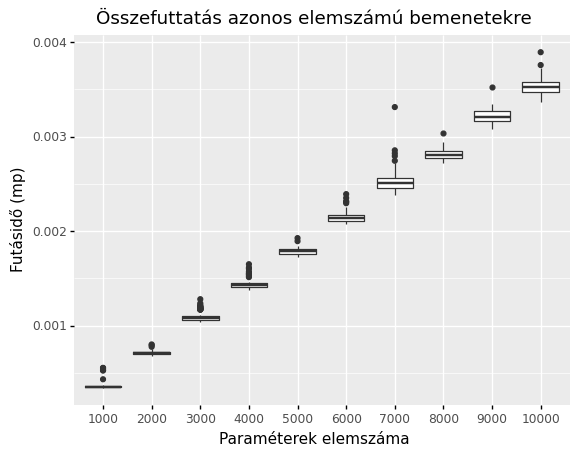

<ggplot: (8747589894160)>

In [36]:
merge_diagonal = merge.query("param1 == param2").copy()
merge_diagonal["param_cat"] = pandas.Categorical(merge_diagonal.param1)
merge_plot = (
    ggplot(merge_diagonal, aes(x="param_cat", y="seconds"))
    + geom_boxplot()
    + xlab("Paraméterek elemszáma")
    + ylab("Futásidő (sec)")
    + ggtitle("Összefuttatás azonos elemszámú bemenetekre")
)
merge_plot

## 3. Kereső algoritmusok

A kereső algoritmusok egy sorozatot és egy elemet fogadnak paraméterként, és a visszatérési értéke megmutatja, hogy az elem megtalálható-e a sorozatban (igaz-hamissal, vagy visszaadja az indexet).
Az én implementációmban a kereső algoritmusok mindig egy `dictionary` értékkel térnek vissza, ami `{found: bool, index: int}` típusú, tehát tartalmazza a logikai és az egész visszatérési értéket is (hamis eredmény esetén az index értéke `-1`). Igaz eredmény esetén az alábbi egyszerű függvényt használtam a visszatérési érték beállítására:

In [ ]:
def _set_search_result(result_dict, index):
    result_dict["found"] = True
    result_dict["index"] = index

Ebben a részben már több olyan algoritmust is vizsgálok, amik összehasonlíthatóak, mivel azonos feladatot (elem keresése egy sorozatban) azonos feltételek (sorozat rendezettsége vagy rendezetlensége) mellett végeznek el.
Ezért a méréseket úgy végeztem, hogy összehasonlítható eredményeket kapjak: egy random generált bemenetre lefuttattam az összetartozó algoritmusokat, és csak utána generáltam új inputot.
Így az egy sorban lévő, különböző implementációkhoz tartozó mérési eredmények biztos, hogy ugyanazokkal a bemeneti paraméterekkel születtek.

Az input generálásnál irányítottam a keresés sikerességét is: a keresett elemet a program minden második esetben a már legenerált sorozatból választja. Így azt is tudom vizsgálni, hogy befolyásolja-e a keresési algoritmusok futási idejét az, hogy a keresett elem megtalálható-e a sorozatban (tehát hogy igaz vagy hamis értékkel tér-e vissza végül).

### 3.1. Keresés rendezetlen sorozatokon

Rendezetlen sorozatokra a lineáris és a strázsás keresést vizsgálom.

#### Lineáris keresés

A lineáris keresés 0-tól egyesével növekvő indexekkel végigiterál a sorozaton, és minden elemet megvizsgál. Ha a keresett elemmel egyenlő elemet talál, akkor a ciklus futása megáll, és visszaadja az utolsó indexet.

A következő a lineáris keresés alap algoritmusa:

In [ ]:
def linear_unsorted_trad(array, checked):
    search_result = {"found": False, "index": -1}
    i = 0
    while i < len(array) and array[i] != checked:
        i += 1
    if i < len(array):
        _set_search_result(search_result, i)
    return search_result

Én viszont, a Python adta lehetőségekkel élve, egy kicsivel kényelmesebb implementációval dolgoztam, és a mérési eredményeim is ebből származnak:

In [ ]:
def linear_unsorted(array, checked):
    search_result = {"found": False, "index": -1}
    for i, element in enumerate(array):
        if element == checked:
            _set_search_result(search_result, i)
            break
    return search_result

#### Strázsás keresés

A strázsás keresés a(z eredeti) lineáris keresés továbbfejlesztett változata. 
Az egyszerű lineáris keresésnél minden iterációban két ellenőrzést végzünk (nem túl nagy-e az index, és az aktuális elem egyenlő-e a keresett elemmel).
Ezek közül az elsőt a strázsás keresésben kiváltjuk azzal, hogy a keresett elemet hozzáadjuk a sorozathoz utolsó elemként.
Így biztos, hogy legkésőbb az utolsó elemnél megáll a ciklus, és nem szalad túl az index, viszont az ellenőrzés kihagyásával gyorsítjuk az algoritmust.

In [ ]:
def sentinel_unsorted(array_param, checked):
    search_result = {"found": False, "index": -1}
    array = array_param[:]
    array.append(checked)
    i = 0
    while array[i] != checked:
        i += 1
    if i < len(array) - 1:  # need the length of the original array here
        _set_search_result(search_result, i)
    return search_result

#### Összehasonlítás

A két algoritmus mérési adatait közös táblában mentettem el. 
Az alábbi táblázatban a futásidők átlagai találhatóak mindkét algoritmusra, a bemenet hossza és a keresés eredménye szerint.

In [113]:
search_unsorted = pandas.read_csv("data/search_unsorted.csv")
search_unsorted["param_length_cat"] = pandas.Categorical(search_unsorted.param_1_length)
search_unsorted.drop(["Unnamed: 0", "param_1_length", "param_2_value"], axis=1, inplace=True)
search_unsorted.loc[:, ["linear_unsorted", "sentinel_unsorted"]] *= 1000
search_unsorted.groupby(["param_length_cat", "found"]).mean().unstack()

linear_unsorted           sentinel_unsorted          
found                      False     True              False     True 
param_length_cat                                                      
1000                    0.033898  0.013633          0.054936  0.023208
2000                    0.069880  0.031457          0.108333  0.051279
3000                    0.105028  0.051813          0.160499  0.082102
4000                    0.139732  0.059881          0.215335  0.095744
5000                    0.181975  0.089874          0.276971  0.140662
6000                    0.211654  0.114999          0.318527  0.180917
7000                    0.238280  0.130167          0.367270  0.203881
8000                    0.281858  0.129375          0.428119  0.204911
9000                    0.302110  0.176778          0.514717  0.308375
10000                   0.352693  0.162759          0.532551  0.258904

A következő kódblokkban felépítek egy ábrát, amin a lineáris és a strázsás keresés futásidői fognak szerepelni, a keresés sikeressége (igaz vagy hamis) szerint is szétbontva. Az egy csoportba tartozó eredményeket dobozábrával ábrázolom, mert ebben az esetben kifejezetten érdekes látni az eredmények kategórián belüli megoszlását.

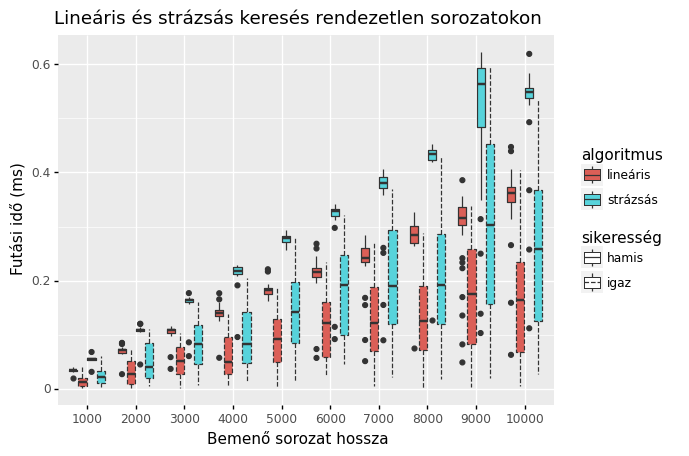

<ggplot: (8728694238139)>

In [109]:
search_unsorted_long = pandas.melt(search_unsorted, id_vars=["param_length_cat", "found"], var_name="algorithm", value_name="seconds")
search_unsorted_plot = (
    ggplot(search_unsorted_long, aes("param_length_cat", "seconds"))
    + geom_boxplot(aes(fill="algorithm", linetype="found"))
    + ggtitle("Lineáris és strázsás keresés rendezetlen sorozatokon")
    + xlab("Bemenő sorozat hossza")
    + ylab("Futási idő (ms)")
    + labs(fill="algoritmus", linetype="sikeresség")
    + scale_fill_discrete(labels=["lineáris", "strázsás"])
    + scale_linetype_discrete(labels=["hamis", "igaz"])
)
search_unsorted_plot


A fenti ábrán pirossal szerepelnek a lineáris és zölddel a strázsás keresés adatai; a szaggatott körvonalú dobozok jelzik a sikeres kereséseket, míg a folytonosak a sikerteleneket.
A sikeres kereséseknél sokkal nagyobb az eredmények szóródása (hosszabbak a dobozok), mint a sikerteleneknél, ez logikus, hiszen változó, hogy a keresett elem a sorozatban hol helyezkedik el, és ebből következően az is, hogy hány iterációt kell elvégezni.
A legtöbb kiugró érték lefele ugrik ki, tehát jellemző az, hogy időnként különösen gyorsan lefut egy keresés, de az nem, hogy néha különösen sokáig tart.
A sikertelen keresések minden paraméterméretre több időbe teltek, mint a sikeresek - szintén a várakozásaimnak megfelelően.
Az ábráról lineáris időkomplexitás olvasható le.
Az azonos méretű paraméterekkel és azonos sikerességgel történt futások közül mindig a lineáris keresés bizonyult gyorsabbnak, ami viszont meglepő, elvileg a strázsás keresésnek kellene időhatékonyabbnak lennie.

Egyébként nagyon gyors mindkettő algoritmus, a futásidők még nagy bemenő elemszámra is alig lépték át a 0,6 ezredmásodpercet.

### 3.2. Keresés rendezett sorozatokon

Rendezett sorozatokon a lineáris, a bináris, és az ugró keresést vizsgálom.

#### Lineáris keresés

A lineáris keresés algoritmusában annyi változik rendezett bemenet esetén, hogy az index túlszaladása helyett azt vizsgáljuk, hogy az aktuális elem nagyobb-e, mint a keresett elem, mely esetben kilépünk a ciklusból.

In [ ]:
def linear_sorted(array, checked):
    search_result = {"found": False, "index": -1}
    for i, element in enumerate(array):
        if element == checked:
            _set_search_result(search_result, i)
            break
        if element > checked:
            break
    return search_result

#### Bináris keresés

A következő algoritmusunk a bináris keresés, mely során kiválasztunk egy középső elemet a sorozatból, amivel a sorozat két részre oszlik. 
Megvizsgáljuk, hogy a középső elem egyenlő-e a keresett elemmel, ha igen, akkor visszatérünk igazzal és az elem indexével. 
Ha nem, akkor eldöntjük, hogy a két részsorozat közül melyikben található a keresett elem, és erre újra elvégezzük a fenti algoritmust. 
A következő kódblokkban egy iteratív implementációt mutatok be.

In [ ]:
def binary_sorted(array, checked):
    search_result = {"found": False, "index": -1}
    if checked < array[0] or checked > array[-1]:
        return search_result
    low = 0
    high = len(array) - 1
    while low <= high:
        center = (low + high) // 2
        if checked < array[center]:
            high = center - 1
        elif checked == array[center]:
            _set_search_result(search_result, center)
            break
        else:
            low = center + 1
    return search_result

#### Ugró keresés

Végül az ugró keresést mutatom be. 
Ebben az algoritmusban a bemenő sorozatot kisebb részekre osztjuk, amik közül a rendezettség miatt könnyen kiválasztható az, amelyikbe a keresett elem tartozik. 
Ezen a blokkon ezután lineáris keresést végzünk. 
Az alábbi implementációban mindezek előtt ellenőrzöm, hogy a keresett elem kisebb-e a sorozat legkisebb, vagy nagyobb-e a sorozat legnagyobb eleménél, ezekben az esetekben nyilván egy ciklus sem fut le.

In [ ]:
def jump_sorted(array, checked):
    search_result = {"found": False, "index": -1}
    if checked < array[0] or checked > array[-1]:
        return search_result

    n = len(array)
    block_length = math.floor(math.sqrt(n))
    low = 0
    high = block_length

    while array[min(n, high) - 1] < checked:
        low = high
        high = low + block_length
        if low >= n:
            return search_result

    block = array[low:high]
    for i, element in enumerate(block):
        if element == checked:
            _set_search_result(search_result, i + low)
            break
        if element > checked:
            break
    return search_result

#### Összehasonlítás

E három algoritmus méréseit is összehangolva végeztem. 
A következő kódblokkban előállítom az ezredmásodpercben mért futásidők algoritmusonkénti és eredmény szerinti átlagait. 
Utána ábrát készítek, oszlopdiagrammon fogom ábrázolni a kiszámított átlagértékeket.

In [89]:
search_sorted = pandas.read_csv("data/search_sorted.csv")
search_sorted["param_length_cat"] = pandas.Categorical(search_sorted.param_1_length)
search_sorted.drop(["Unnamed: 0", "param_1_length", "param_2_value"], axis=1, inplace=True)
search_sorted.loc[:, ["linear_sorted", "binary_sorted", "jump_sorted"]] *= 1000
means = search_sorted.groupby(["param_length_cat", "found"]).mean()
means = means.unstack()
means

linear_sorted           binary_sorted           jump_sorted  \
found                    False     True          False     True        False   
param_length_cat                                                               
1000                  0.021982  0.020733      0.002518  0.002460    0.005498   
2000                  0.045881  0.044479      0.002680  0.002642    0.007515   
3000                  0.073013  0.060749      0.002851  0.002728    0.009050   
4000                  0.082002  0.101948      0.002947  0.002966    0.009217   
5000                  0.116892  0.108924      0.003023  0.003018    0.010686   
6000                  0.150609  0.152950      0.003071  0.003104    0.012155   
7000                  0.181785  0.147209      0.003171  0.003171    0.013294   
8000                  0.182462  0.176554      0.003238  0.003200    0.013528   
9000                  0.208669  0.221419      0.003233  0.003247    0.014038   
10000                 0.239792  0.219369      0.003304  0.003595    0.014625   

                            
found                True   
param_length_cat            
1000              0.005693  
2000              0.007434  
3000              0.008235  
4000              0.010438  
5000              0.010629  
6000              0.012574  
7000              0.011563  
8000              0.012684  
9000              0.014415  
10000             0.013971

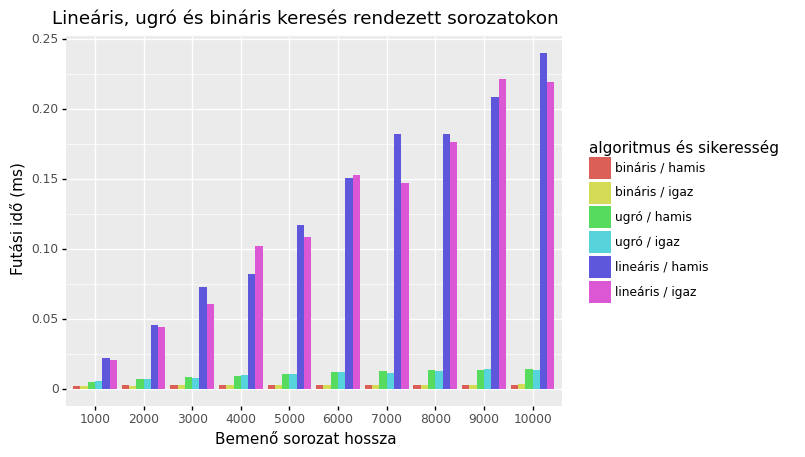

<ggplot: (8728692131581)>

In [91]:
means["param"] = means.index.values
means.columns = ["linear_false", "linear_true", "binary_false", "binary_true", "jump_false", "jump_true", "param"]
means_long = pandas.melt(means, id_vars=["param"], var_name="algorithm", value_name="milliseconds")
means_long
search_unsorted_means_plot = (
    ggplot(means_long, aes("param", "milliseconds", fill="algorithm"))
    + geom_bar(stat="identity", position="dodge")
    + ggtitle("Lineáris, ugró és bináris keresés rendezett sorozatokon")
    + xlab("Bemenő sorozat hossza")
    + ylab("Futási idő (ms)")
    + labs(fill="algoritmus és sikeresség")
    + scale_fill_discrete(labels=["bináris / hamis", "bináris / igaz", "ugró / hamis", "ugró / igaz", "lineáris / hamis", "lineáris / igaz"])
)
search_unsorted_means_plot

Az ábrán jól látszik, hogy, a rendezetlen keresésekkel ellentétben, a sikeres és a sikertelen keresések eredményei már nem térnek el feltűnően.
A lineáris keresés rendezett sorozaton is lineáris idejű, de több mint kétszer olyan gyors: nem éri el a 0,25 ezredmásodpercet.
Az ugró és a bináris keresés még gyorsabbak, ezeket külön is ábrázolom, hogy a trendek jobban láthatóak legyenek:

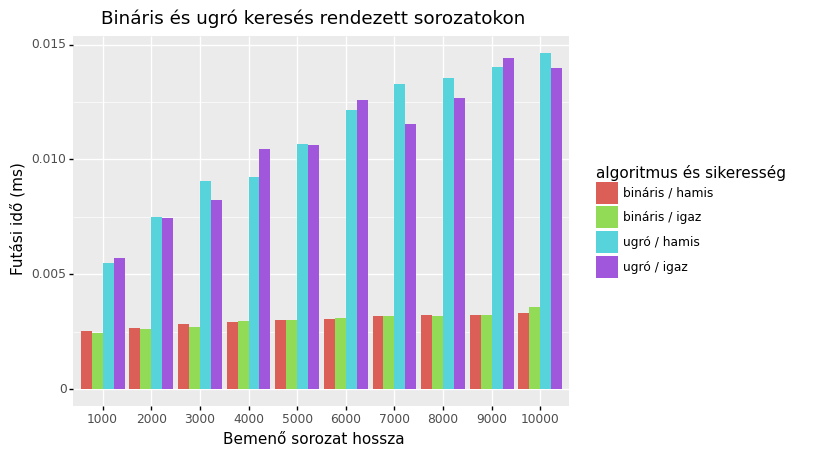

<ggplot: (8728692590068)>

In [93]:
means2 = means.drop(["linear_false", "linear_true"], axis=1)
means2_long = pandas.melt(means2, id_vars=["param"], var_name="algorithm", value_name="milliseconds")
search_unsorted_means2_plot = (
    ggplot(means2_long, aes("param", "milliseconds", fill="algorithm"))
    + geom_bar(stat="identity", position="dodge")
    + ggtitle("Bináris és ugró keresés rendezett sorozatokon")
    + xlab("Bemenő sorozat hossza")
    + ylab("Futási idő (ms)")
    + labs(fill="algoritmus és sikeresség")
    + scale_fill_discrete(labels=["bináris / hamis", "bináris / igaz", "ugró / hamis", "ugró / igaz"])
)
search_unsorted_means2_plot

Ezeknél az algoritmusoknál a keresés sikerességének már szinte semmilyen hatása nincs a futásidőre.
Az ugró keresés eredményein kirajzolódik az O(√n) időkomplexitás.
A bináris keresés esetén a futási idő a bemenet növelésével lineárisan, de 1-nél kisebb meredekséggel nő, ez is látszik az ábrán (bár a látvány nem sokban különbözik egy konstans idejű algoritmus eredményeitől).

## 4. Rendező algoritmusok

Végül hatféle rendező algortimust vizsgálok.
Rendezettségen alapvetően növekvő sorrendet értek, a rendező algoritmusaim kimenete is növekvő.
Ahol pedig fordítva, vagy visszafelé rendezett sorozatokról írok, ezek értelemszerűen csökkenő sorrendbe vannak rendezve.

A méréseimet az esetek egyharmadában random bemenettel végeztem, a második harmad esetén a bemenő sorozat rendezett volt, a maradék esetekben pedig visszafelé rendezett.

Bár az alábbi algoritmusok implementálhatóak úgy is, hogy a bemenetet "helyben" változtassák meg, én mindig másolatot készítettem a paraméterről (vagy új, üres listát hoztam létre), és visszaadtam a rendezett sorozatot.
Erre szükség volt ahhoz, hogy ugyanazon a random generált tömbön egymás után több rendezést is le tudjak futtatni, illetve hogy egyszerű legyen a tesztelés és az eredmények összehasonlítása.

Ebben a részben már csak vonaldiagrammokal dolgozom.
A mérési eredmények egy-egy kategórián belül alig szóródnak, így nem vesztünk semmit az átlagok használatával.

A rendezési algoritmusokban sokszor van szükség a sorozat két elemének cseréjére, ezért ezt kiszerveztem egy külön függvénybe.

In [6]:
def swap_elements(array, index1, index2):
    array[index1], array[index2] = array[index2], array[index1]

Minden algoritmusokhoz készítek ábrákat külön-külön is.
A mérési adatokat ezért betöltöm a fejezet elején.
Az alábbi összefoglaló táblázatból látszik, hogy a rendező algoritmusok többségének a futásideje ismét másodperces nagyságrenden mérhető.

In [103]:
sort_data = pandas.read_csv("data/sorting.csv")
sort_data["param_length_cat"] = pandas.Categorical(sort_data.param_1_length)
sort_data["recursion_error"] = pandas.Categorical(sort_data.quicksortRecursionError)
sort_data.drop(columns=["Unnamed: 0", "param_1_length", "quicksortRecursionError"], inplace=True)
sort_data.describe()

,insertion_sort,bubble_sort,selection_sort,comb_sort,enhanced_cocktail_sort,quicksort
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.235949,2.979490,0.852185,0.012945,2.530641,0.458614
std,1.653414,3.088039,0.704053,0.008560,3.308484,0.503031
min,0.000420,0.028241,0.020910,0.001117,0.000061,0.001468
25%,0.013777,0.498305,0.194332,0.005603,0.000517,0.013989
50%,0.497410,1.965726,0.702650,0.012228,1.097700,0.216780
75%,2.047785,4.504965,1.367582,0.017580,4.507988,0.857109
max,6.354105,12.531343,2.347701,0.041322,12.808544,1.919345


Ezután definiálok néhány függvényt, amik segítségével egyszerűbb lesz az adatokon a szükséges változtatásokat elvégezni.

In [11]:
def clean_sorting_data(algorithm):
    data = sort_data.loc[:, ["param_length_cat", algorithm, "input_control"]]
    data = data.groupby(["param_length_cat", "input_control"]).mean().unstack()
    data.columns = ["random", "reverse", "sorted"]
    data["param"] = data.index.values
    return data

def melt_sorting_data(data):
    return data.melt(id_vars="param", var_name="input", value_name="seconds")

def plot_sorting(data, algorithm_name):
    plot = (
        ggplot(data, aes("param", "seconds", color="input", group="input"))
        + geom_line()
        + ggtitle(algorithm_name)
        + xlab("Bemenő sorozat hossza")
        + ylab("Futási idő (sec)")
        + labs(fill="bemenet")
        + scale_color_manual(values=["blue", "red", "green"], labels=["random", "fordított", "rendezett"])
    )
    return plot

def plot_single(data, title):
    plot = (
        ggplot(data, aes("param", "seconds", group="input"))
        + geom_line()
        + ggtitle(title)
        + xlab("Bemenő sorozat hossza")
        + ylab("Futási idő (sec)")
    )
    return plot

### 4.1. Beszúró rendezés

A beszúró rendezés algoritmusában sorra vesszük a sorozat elemeit, és egyenként megkeressük a helyüket.
Az alábbi implementációban a kimenő listába először betesszük a rendezetlen sorozat első elemét, majd minden további elemnél végigiterálunk az egyre bővülő kimenő listán, és beillesztjük az első, nála nagyobb vagy egyenlő elem elé (vagy a lista végére).

In [165]:
# Algoritmus
def insertion_sort(array):
    out = []
    for element in array:
        if len(out) == 0:
            out.append(element)
        else:
            i = 0
            while i <= len(out) - 1 and element > out[i]:
                i += 1
            out.insert(i, element)
    return out

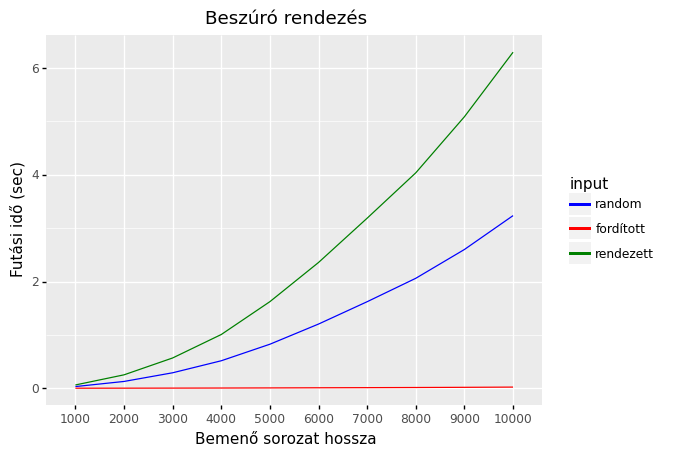

<ggplot: (8728698905853)>

In [9]:
# Ábra
insertion = clean_sorting_data("insertion_sort")
insertion_long = melt_sorting_data(insertion)
plot_sorting(insertion_long, "Beszúró rendezés")

A fenti ábrán látható, hogy az algoritmus abban az esetben teljesít legrosszabbul, ha már eleve rendezett a bemenő sorozat.
Ez annyira meglepett, hogy először nekiálltam megkeresni a hibát a kódomban.
De aztán rájöttem, hogy ez teljesen indokolt.
Ha ugyanis a bemenő sorozat rendezett, az első eleme a legkisebb, így az kerül be először a kimenő sorozatba.
Majd a bemenet minden egyes elemére végig kell iterálni a teljes kimeneten, hiszen minden elem a kimenet végére kerül.
A fordítva rendezett sorozatoknál viszont minden elem a kimenő sorozat legelejére kerül, így az algoritmus sokkal gyorsabban lefut.

A legrosszabb és az átlagos eset (véletlenszerű bemenet) parabolára emlékeztető görbét rajzolt ki a fenti ábrán. Érdekes eredmény, hogy az átlagos eset minden paraméterhosszra szinte pontosan feleannyi idő alatt futott le, mint a legrosszabb eset.

A legjobb eset konstans idejűnek tűnik, de az alábbi külön ábrán látható, hogy ez nem így van, a futási ideje lineárisan nő (hiszen a bemenő sorozaton végig kell iterálni), csak ezek az idők két nagyságrenddel kisebbek a másik két esethez képest.

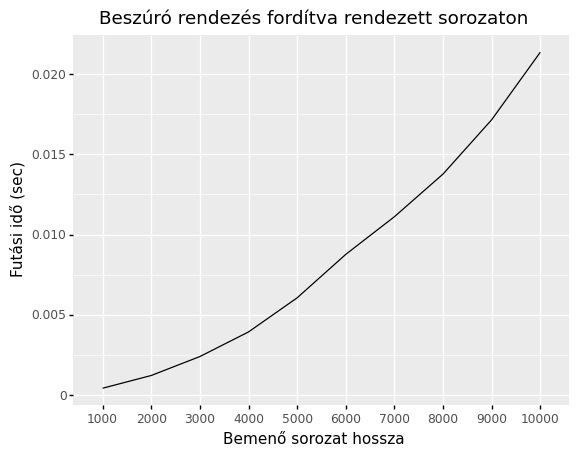

<ggplot: (8728696663531)>

In [12]:
plot_single(insertion_long.query("input=='reverse'"), "Beszúró rendezés fordítva rendezett sorozaton")

### 4.2. Minimumkiválasztásos rendezés

Ebben az algoritmusban a sorozat elejétől kezdjük a rendezést.
A külső ciklus változója az az index, ahova a következő elemet keressük, melynek ez lesz a végleges helye.
A rendezetlen rész felett iterálva megkeressük annak legkisebb elemét, és végül felcseréljük az előbb említett indexen pillanatnyilag található elemmel.

In [ ]:
# Algoritmus
def selection_sort(array):
    out = array[:]
    for i in range(len(out)):
        index_of_minimal_element = i
        for j in range(i + 1, len(out)):
            if out[j] < out[index_of_minimal_element]:
                index_of_minimal_element = j
        util.swap_elements(out, i, index_of_minimal_element)
    return out

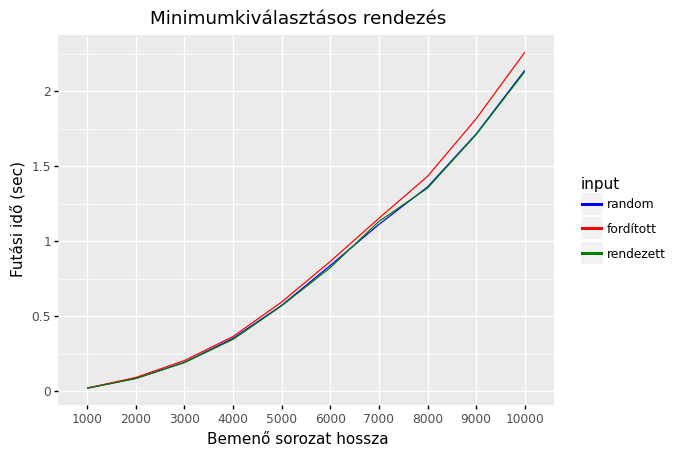

<ggplot: (8728696605618)>

In [15]:
# Ábra
selection = clean_sorting_data("selection_sort")
selection_long = melt_sorting_data(selection)
plot_sorting(selection_long, "Minimumkiválasztásos rendezés")

A random és a rendezett bemenettel végzett mérések eredményei egyáltalán nem különülnek el, visszafelé rendezett bemenetre is csak enyhe romlás (tízezer elemes sorozatokra is csak kb. egynyolcad másodperc) figyelhető meg.
A minimumkiválasztásos rendezés esetében tehát a sorozat eredeti rendezettsége vagy annak hiánya nem változtat a futási időn.

### 4.3. Buborékrendezés

A buborékrendezés szomszédos elemeket hasonlít össze, és ezek helyes sorrendbe tételével rendezi a sorozatot.
Minden iterációban egy elemről tudjuk biztosan, hogy a helyére került, tehát a bemenő sorozat hosszának megfelelő számú iterációra van szükség (bár ezek a sorozat egyre kisebb részén iterálnak).
A buborékrendezés ezért nem tartozik a hatékony rendező algoritmusok közé, a teljesítménye jelentősen javítható azzal, ha figyeljük a cserék számát az iterációk közben, és megszakítjuk a futást akkor, ha egy iterációban nem történt csere (hiszen ekkor már rendezett a sorozat).

In [168]:
# Algoritmus
def bubble_sort(array):
    out = array[:]
    n = len(array)
    for i in range(n):
        for j in range(n - i - 1):
            if out[j] > out[j + 1]:
                swap_elements(out, j, j + 1)
    return out

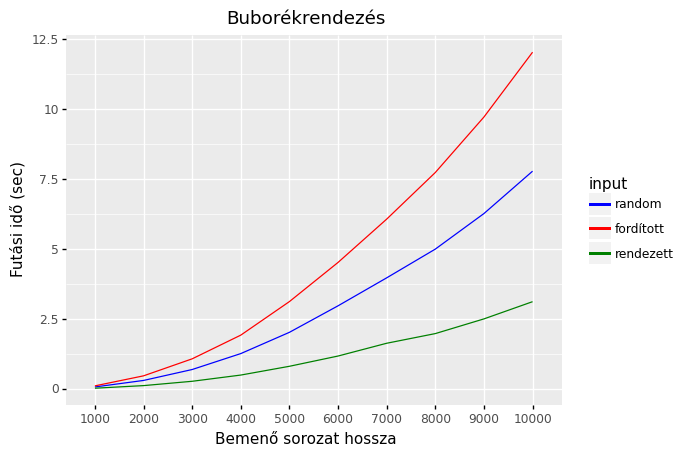

<ggplot: (8728696624966)>

In [17]:
# Ábra
bubble = clean_sorting_data("bubble_sort")
bubble_long = melt_sorting_data(bubble)
plot_sorting(bubble_long, "Buborékrendezés")

Az ábrán látható, hogy a buborékrendezés a hallgatói intuíciónak megfelelően működik, azaz rendezett sorozatokra fut le leggyorsabban, és fordítva rendezettekre a leglassabban.
A legrosszabb esetben valóban elég rossz eredményeket kaptunk: a futások átlagideje kb. kétszerese a beszúró rendezés legrosszabb eseténél mért időknek.

### 4.4. Fésűs rendezés

A fésűs rendezés is tekinthető a buborékrendezés továbbfejlesztett változatának.
Ugyanúgy elempárokat hasonlít össze és tesz megfelelő sorrendbe, csak változtatja az elempárok közötti távolságot.
Ez a távolság a sorozat hosszától indul, és mindig az 1,3-mal való osztás egészrészére módosul (az 1,3-as osztó kísérleti eredmények alapján bizonyult a leghatékonyabbnak).
Így véges sok iteráció után eljutunk oda, hogy a távolság értéke 1 lesz, tehát a szomszédos elemeket hasonlítjuk össze, mint a buborékrendezésben.
Eddigre viszont a sorozat rendezettsége jobb, mint eredetileg, így a költséges, szomszédos elemeket összehasonlító iterációkból csak kevésre van szükség.
Az algoritmus futása akkor áll meg, ha egy iterációban nem történik csere.

In [ ]:
# Algoritmus
def comb_sort(array):
    shrink = 1.3
    out = array[:]
    gap = len(out)
    is_sorted = False

    while not is_sorted:  # More than one iteration may be needed with gap = 1
        gap = math.floor(gap / shrink)
        if gap <= 1:
            gap = 1
            is_sorted = True
        for i in range(len(out) - gap):
            if out[i] > out[i + gap]:
                util.swap_elements(out, i, i + gap)
                is_sorted = False
    return out

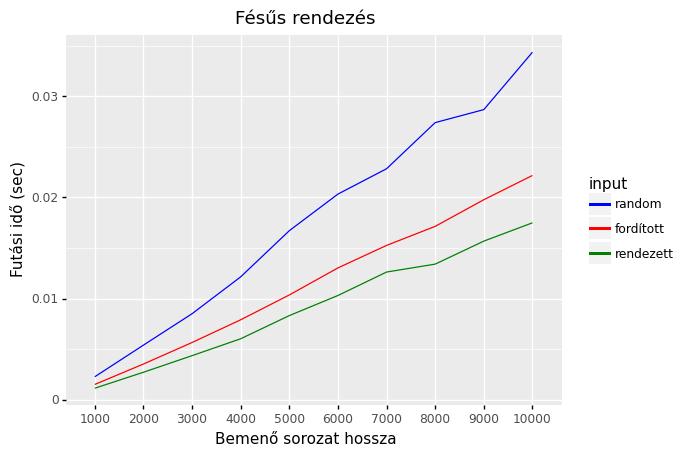

<ggplot: (8728696155471)>

In [21]:
# Ábra
comb = clean_sorting_data("comb_sort")
comb_long = melt_sorting_data(comb)
plot_sorting(comb_long, "Fésűs rendezés")

Ebben az esetben ismét elválnak egymástól a futásidők a bemenet rendezettségétől függően. 
Rendezett sorozatokon fut leggyorsabban a fésűs rendezés, majd a fordítva rendezett sorozat, végül a véletlenszerű következik.
A futásidők átlaga legrosszabb esetben sem érte el az 5 századmásodpercet.
Ez azt jelenti, hogy az összehasonlított elemek távolságának szisztematikus változtatásával a buborékrendezésnél 200-szor gyorsabb algoritmushoz jutottunk.

### 4.5. Koktélrendezés

A koktélrendezés alapja szintén a buborékrendezés.
Itt a szomszédos elemeket összehasonlító iterációk közül minden másodiknak megfordítjuk az irányát.
Így felváltva kerül a helyére egy-egy elem a sorozat elején és végén.

In [ ]:
# Algoritmus
def enhanced_cocktail_sort(array):
    out = array[:]
    low = 0
    high = len(out) - 1

    while low < high:
        swapped = False
        for i in range(low, high):
            if out[i] > out[i + 1]:
                util.swap_elements(out, i, i + 1)
                swapped = True

        if not swapped:
            break

        swapped = False
        high -= 1

        for i in range(high, low, -1):
            if out[i] < out[i - 1]:
                util.swap_elements(out, i, i - 1)
                swapped = True

        if not swapped:
            break
        low += 1

    return out

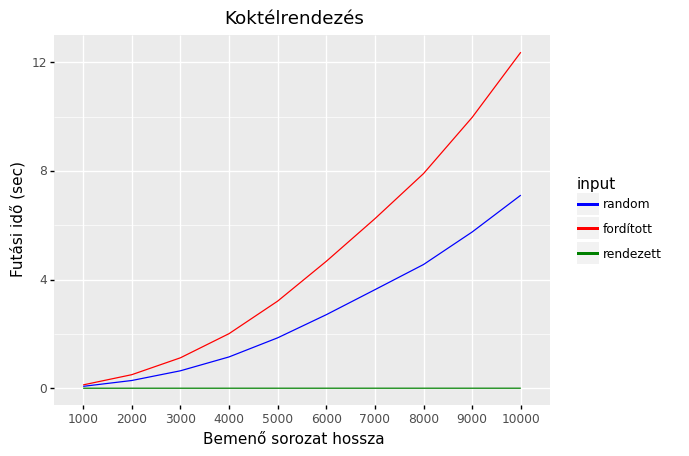

<ggplot: (8728696062181)>

In [22]:
# Ábra
cocktail = clean_sorting_data("enhanced_cocktail_sort")
cocktail_long = melt_sorting_data(cocktail)
plot_sorting(cocktail_long, "Koktélrendezés")

Az eredmények nagyon hasonlóak a buborékrendezéshez, komoly javulás a legjobb esetben figyelhető meg.
Ez azonban annak köszönhető, hogy a koktélrendezés implementációjába beépítettem a cserék figyelését, ezért rendezett sorozat esetén csak egy iteráció fut le.
Ahogy az alábbi ábrán látható, a legjobb eset lineáris idejű.

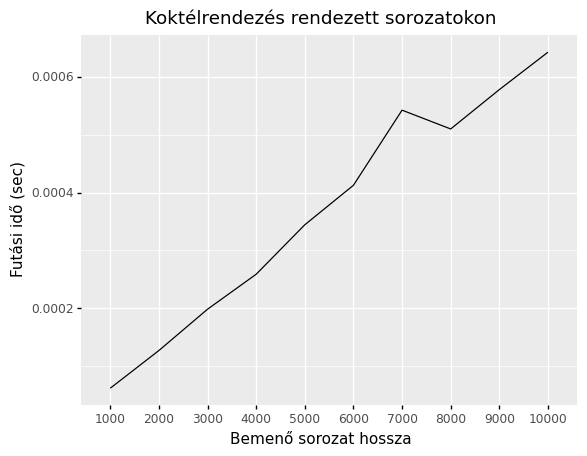

<ggplot: (8728694977012)>

In [27]:
plot_single(cocktail_long.query("input=='sorted'"), "Koktélrendezés rendezett sorozatokon")

### 4.6. Gyorsrendezés

Végül a gyorsrendezés algoritmusát mutatom be, ami nagyban különbözik az eddigiektől.
A rendezendő sorozatból kiválasztunk egy elemet (az egyszerűség kedvéért én az első helyen állót választottam), ezt nevezzük pivotelemnek. 
Ezután a maradék elemeket két sorozatba rendezzük aszerint, hogy a pivotelemnél kisebbek vagy nagyobbak.
Végül ezekre is elvégezzük a gyorsrendezést.

Ez az algoritmus akkor hatékony, ha a pivotelem nagyjából két egyforma nagyságú részre osztja a sorozatot.
Bármilyen irányban előre rendezett bemenet esetén ennek pontosan az ellenkezője valósul meg: vagy a pivotelemnél kisebb, vagy az annál nagyobb elemek tömbje üres lesz.
Tehát mindkettő tekinthető legrosszabb esetnek.

In [ ]:
def quicksort(array):
    if array == []:
        return array
    out = array[:]
    pivot = out[0]
    lesser = quicksort([e for e in out[1:] if e < pivot])
    greater = quicksort([e for e in out[1:] if e >= pivot])
    return lesser + [pivot] + greater

Ahogy a kódon is látható, rekurzív implementációval deolgoztam, ami elegáns, és az iteratív változatoknál jóval egyszerűbb, a méréseket viszont megnehezítette.
Legrosszabb esetben ugyanis, 3000-es és annál nagyobb elemszámnál az algoritmus minden alkalommal elérte a rekurzív hívások maximális számát (amit eddigre már 1000-ről 2500-ra emeltem), és nem tudott végigfutni.
Ezekben az esetekben is elmentettem a futásidőt, de ezeket nincs értelme elemezni, és a többivel összehasonlítani.
Ezért csak véletlenszerű bemenetre vannak adataim kétezres elemszám felett.

/media/zsofi/Palaven/Zsofi/aktiv/EKE/targyak/2_felev/algoritmusok/gyak_beadando/algoritmusok_elemzes/venv/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 8 rows containing missing values.


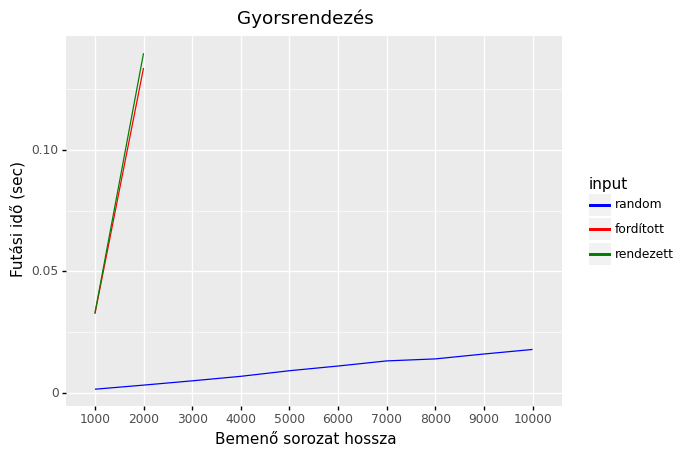

<ggplot: (8728692185025)>

In [105]:
quicksort = sort_data.loc[:, ["param_length_cat", "quicksort", "input_control", "recursion_error"]]
quicksort = quicksort.query("recursion_error != 1")
quicksort.drop(columns="recursion_error", axis=1, inplace=True)
quicksort = quicksort.groupby(["param_length_cat", "input_control"]).mean().unstack()
quicksort.columns = ["random", "reverse", "sorted"]
quicksort["param"] = quicksort.index.values
quicksort_long = melt_sorting_data(quicksort)
plot_sorting(quicksort_long, "Gyorsrendezés")

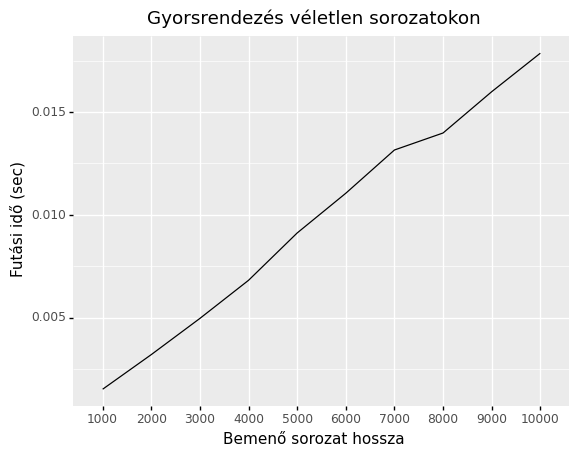

<ggplot: (8728696015999)>

In [40]:
plot_single(quicksort_long.query("input=='random'"), "Gyorsrendezés véletlen sorozatokon")

A második ábrán látszik, hogy a gyorsrendezés random bemenetre lineáris vagy annál is jobb időhatékonysággal rendelkezik.

### 4.7. Rendezési algoritmusok összehasonlítása

Végül összehasonlítom a fent bemutatott rendezési algoritmusok futásidejét, hogy sorrendet állíthassak fel közöttük.
Ehhez a random bemenettel mért időket fogom használni.
Két ábrát készítek, mert a fésűs rendezés és a gyorsrendezés századmásodperces skálán mozognak, a többi rendezés másodperces adatai mellett az ő viszonyuk nem lenne látható.

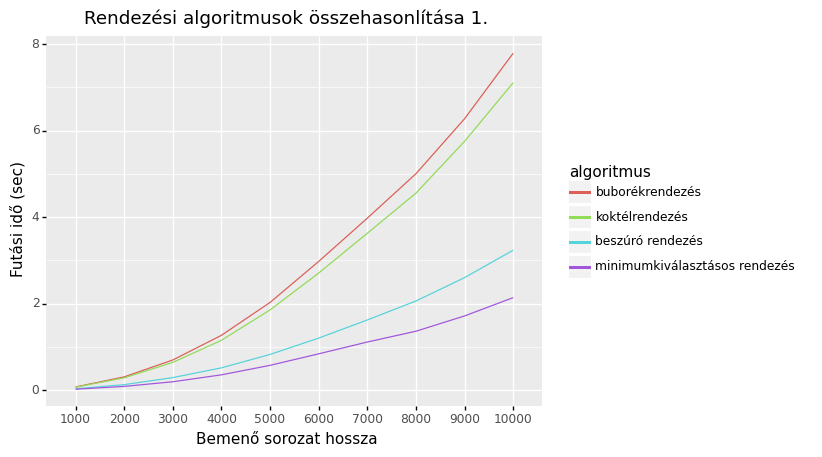

<ggplot: (8728694499112)>

In [64]:
compare = sort_data.query("input_control=='random'")
data = compare.drop(columns=["index", "input_control", "param_1_length", "quicksortRecursionError"])
sort_means = data.groupby("param_length_cat").mean()
sort_means["param"] = sort_means.index.values
slow = sort_means.loc[:, ["param", "insertion_sort", "selection_sort", "bubble_sort", "enhanced_cocktail_sort"]]
slow_long = slow.melt(id_vars="param", var_name="algorithm", value_name="seconds")

(
    ggplot(slow_long, aes("param", "seconds", color="algorithm", group="algorithm"))
    + geom_line()
    + scale_color_discrete(labels=["buborékrendezés", "koktélrendezés", "beszúró rendezés", "minimumkiválasztásos rendezés"])
    + ggtitle("Rendezési algoritmusok összehasonlítása 1.")
    + xlab("Bemenő sorozat hossza")
    + ylab("Futási idő (sec)")
    + labs(color="algoritmus")
)

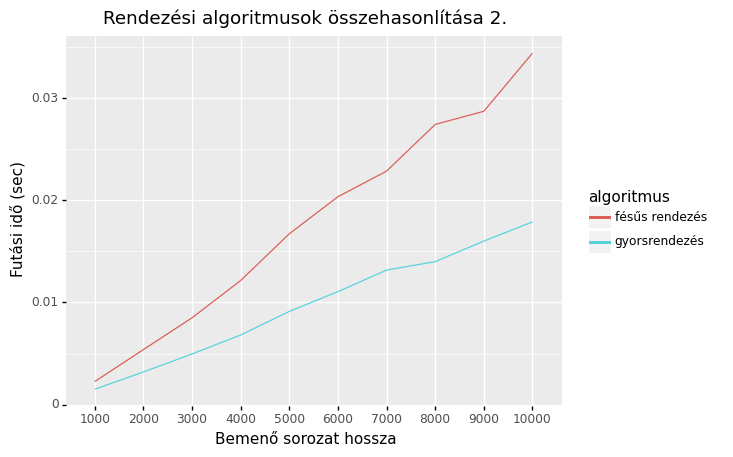

<ggplot: (8728696118399)>

In [69]:
quick = sort_means.loc[:, ["param", "comb_sort", "quicksort"]]
quick_long = quick.melt(id_vars="param", var_name="algorithm", value_name="seconds")
quick_long
(
    ggplot(quick_long, aes("param", "seconds", color="algorithm", group="algorithm"))
    + geom_line()
    + scale_color_discrete(labels=["fésűs rendezés", "gyorsrendezés"])
    + ggtitle("Rendezési algoritmusok összehasonlítása 2.")
    + xlab("Bemenő sorozat hossza")
    + ylab("Futási idő (sec)")
    + labs(color="algoritmus")
)

A rendezési algoritmusok gyorsasági sorrendje tehát ez:
1. Gyorsrendezés
2. Fésűs rendezés
3. Minimumkiválasztásos rendezés
4. Beszúró rendezés
5. Koktélrendezés
6. Buborékrendezés

## 5. Összefoglalás

Dolgozatomban tizennégy különböző algoritmust és a róluk készített mérési eredményeimet mutattam be.
A méréseket 1000 és 10000 között változtatott elemszámú bemenő sorozatokkal, a keresési és a rendezési algoritmusok esetében irányított paraméterekkel készítettem.

Először egyszerű algoritmusokat elemeztem: a metszetet, az uniót, és az összefuttatást. 
Ez utóbbi nagyságrendekkel jobb eredményeket produkált, mint a másik kettő.
Érdekes volna megvizsgálni, hogy hogy teljesít az unióhoz képest, ha ugyanazt a bemenő sorozatokat először valamelyik rendezési algoritmussal rendezem, és utána futtatom le rajtuk az összefuttatást.

A keresési algoritmusok bizonyultak a leggyorsabbnak, egy futás hossza sem érte el az egy ezredmásodpercet.
Rendezetlen sorozaton való keresésnél még befolyásolta a futási időt a keresés sikeressége, a rendezett inputot fogadó algoritmusoknál viszont már nem.

Végül rendezési algoritmusokat mutattam be.
Az algoritmusok változatosnak bizonyultak abból a szempontból, hogy melyiknek mi jelenti a legrosszabb esetet: van, amelyiknek a visszafelé rendezett, van amelyiknek a random sorozat, és olyan is, ami egy már rendezett sorozaton fut a leglassabban.
Az összehasonlítás tanulsága az, hogy tényleg a gyorsrendezés a leggyorsabb.